# Get the image of a given row

In [85]:
rowNumber = 4

In [86]:
import pandas as pd

df = pd.read_csv('../data/GalaxyZoo1_DR_table2.csv')

# get dataframe row number 1
print(f"Row number: {rowNumber}")
row = df.iloc[rowNumber]

coords = {'RA': row['RA'], 'DEC': row['DEC']}
coords

Row number: 4


{'RA': '00:00:01.55', 'DEC': '-00:05:33.3'}

In [87]:
from astropy.coordinates import SkyCoord
from astropy import units as u

ra_str = coords['RA']
dec_str = coords['DEC']

coord = SkyCoord(ra_str, dec_str, unit=(u.hourangle, u.deg), frame="icrs")

degree_coords = {'RA': coord.ra.deg, 'DEC': coord.dec.deg}
degree_coords

{'RA': np.float64(0.006458333333333332),
 'DEC': np.float64(-0.09258333333333332)}

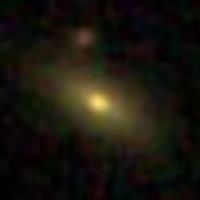

In [88]:
import requests
from PIL import Image
from io import BytesIO

# API ref: https://skyserver.sdss.org/dr16/en/help/docs/api.aspx#imgcutout
path = 'https://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg'
query = {
    'ra': degree_coords['RA'],
    'dec': degree_coords['DEC'],
    'scale': 0.1,
    'width': 200,
    'height': 200,
    'opt': ''
}

response = requests.get(path, params=query)

i = Image.open(BytesIO(response.content))
i.show()
# i.save('galaxy_image.jpg')